In this lab session we try out Bayesian (belief) network. While sklearn package already support Naïve Bayes classifier, we also need <a href="https://pypi.org/project/bnlearn/">bnlearn</a>, a Python package for learning the graphical structure of Bayesian networks, parameter learning, inference and sampling methods.
Our main focus in this session is to test some of the Bayesian models. 



In [1]:
!pip install bnlearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 KB 917.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.6/216.6 KB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 50.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 748.9/748.9 KB 33.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 KB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 53.3 MB/s eta 0:00:00
  Created wheel for pyvis: filename=pyvis-0.3.1-py3-none-any.whl size=755850 sha256=b4161d2624d026b25c82d79028afed59e8ea0a2fe60d4137797e305852fe81b1
  Stored in directory: /root/.cache/pip/wheels/a4/0c/61/8469ca276f96ab772c3acc7f47d71e9737cbdf6f446f017f48
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=4b88

In [2]:
!pip install pymc3==3.10  #issue fixed for version 3
!pip install --upgrade numpy==1.20.3
!pip install --upgrade arviz==0.11.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 37.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 39.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for theano-pymc: filename=Theano_PyMC-1.0.11-py3-none-any.whl size=2572038 sha256=db028f7cff048a33df0458c85724b4837773a0bbd87f7330c9b0401c9010c0ec
  Stored in directory: /root/.cache/pip/wheels/99/88/68/b96f52d2e413b171deb56ff4512d8e427103bd8e251aa8aeaf
Successfully built theano-pymc
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.4/15.4 MB 24.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
ERROR: pip's dependency resolver does not currently take into account 


# Dataset

An information system (IS) adoption dataset is used for the analysis. There are four variables: 

- Good_publicity indicates whether the IS has a positive reputation. 
- Good_support indicates whether the IS has good community support.
- Easy_to_use indicates whether the IS is easy to use.
- Adoption indicates whether the IS is adopted or not.

In [1]:
!wget --no-check-certificate --output-document=adoption.csv 'https://docs.google.com/spreadsheets/d/e/2PACX-1vSkdryhamccz-h6RV7T8XwP1fkanErwuEZdMpNYzKrdixCXD7cbCkAzbD70c1sh0Rzq0PbJWL6L3HTX/pub?gid=829262811&single=true&output=csv'

import pandas as pd
import numpy as np
df = pd.read_csv('adoption.csv')

--2023-02-23 18:46:03--  https://docs.google.com/spreadsheets/d/e/2PACX-1vSkdryhamccz-h6RV7T8XwP1fkanErwuEZdMpNYzKrdixCXD7cbCkAzbD70c1sh0Rzq0PbJWL6L3HTX/pub?gid=829262811&single=true&output=csv
Resolving docs.google.com (docs.google.com)... 142.251.167.113, 142.251.167.102, 142.251.167.139, ...
Connecting to docs.google.com (docs.google.com)|142.251.167.113|:443... connected.
HTTP request sent, awaiting response... 307 Temporary Redirect
Location: https://doc-08-9o-sheets.googleusercontent.com/pub/mq6he3r7ig44qobar1fsg51390/habnmr4pvksfqdetbuisfe5cok/1677177960000/108328119934179437001/*/e@2PACX-1vSkdryhamccz-h6RV7T8XwP1fkanErwuEZdMpNYzKrdixCXD7cbCkAzbD70c1sh0Rzq0PbJWL6L3HTX?gid=829262811&single=true&output=csv [following]
--2023-02-23 18:46:04--  https://doc-08-9o-sheets.googleusercontent.com/pub/mq6he3r7ig44qobar1fsg51390/habnmr4pvksfqdetbuisfe5cok/1677177960000/108328119934179437001/*/e@2PACX-1vSkdryhamccz-h6RV7T8XwP1fkanErwuEZdMpNYzKrdixCXD7cbCkAzbD70c1sh0Rzq0PbJWL6L3HTX?gid=829262

Testing the Naïve Bayes classifier is relatively simply, as it is straightforward to use the sklearn package.  

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
X=df[["Good_publicity","Good_support","Easy_to_use"]] 
y=df["Adoption"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
cnb = CategoricalNB()
y_pred = cnb.fit(X_train, y_train).predict(X_test)

Although it is more common to use cross validation. The sklearn package has internal build in function to support such testing. Area under the Receiver operating characteristic (AUC) is reported here but other metrics could be used as well. 

In [3]:
from sklearn.model_selection import cross_val_score
auc = cross_val_score(cnb, X, y, cv=5,scoring='roc_auc')
np.mean(auc)

0.902570810979042

In [4]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
y_pred = mnb.fit(X_train, y_train).predict(X_test)
auc = cross_val_score(mnb, X, y, cv=5,scoring='roc_auc')
np.mean(auc)

0.8079695021208464

Then we use the bnlearn package to build a Bayesian network, where a more complex model structure could be used rather than a Naïve Bayesian.
 Structure learning is used to infer the network structure using data. 


[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).
[bnlearn] >Compute edge strength with [chi_square]
[bnlearn] >Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


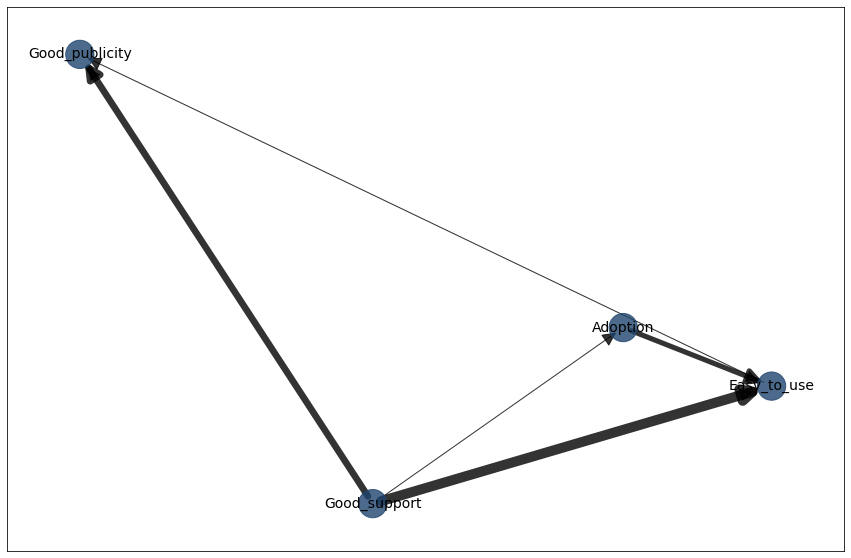

In [5]:
import bnlearn as bn
# Example dataframe sprinkler_data.csv can be loaded with: 

model = bn.structure_learning.fit(df,root_node='Adoption')
# Compute edge strength with the chi_square test statistic
model = bn.independence_test(model, df)
G = bn.plot(model)

Does the graph make sense to interpret the interrelation between variables? Do you agree?
Alternatively, one can create a network structure on their own and try to fit a model. It is sometimes interesting to compare a “data-driven” model and a “expert-driven” model.


[bnlearn] >bayes DAG created.
[bnlearn] >No CPDs to print. Hint: Add CPDs as following: <bn.make_DAG(DAG, CPD=[cpd_A, cpd_B, etc])> and use bnlearn.plot(DAG) to make a plot.
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model
[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >CPD of Easy_to_use:
+----------------+----------+
| Easy_to_use(0) | 0.494667 |
+----------------+----------+
| Easy_to_use(1) | 0.505333 |
+----------------+----------+
[bnlearn] >CPD of Adoption:
+--------------+-----+--------------------+
| Easy_to_use  | ... | Easy_to_use(1)     |
+--------------+-----+--------------------+
| Good_support | ... | Good_support(1)    |
+--------------+-----+--------------------+
| Adoption(0)  | ... | 0.4315068493150685 |
+--------------+-----+--------------------+
| Adoption(1)  | ... | 0.5684931506849316 |
+--------------+-----+--------------------+
[bnlearn] >CPD of Good_publicity:
+----------------

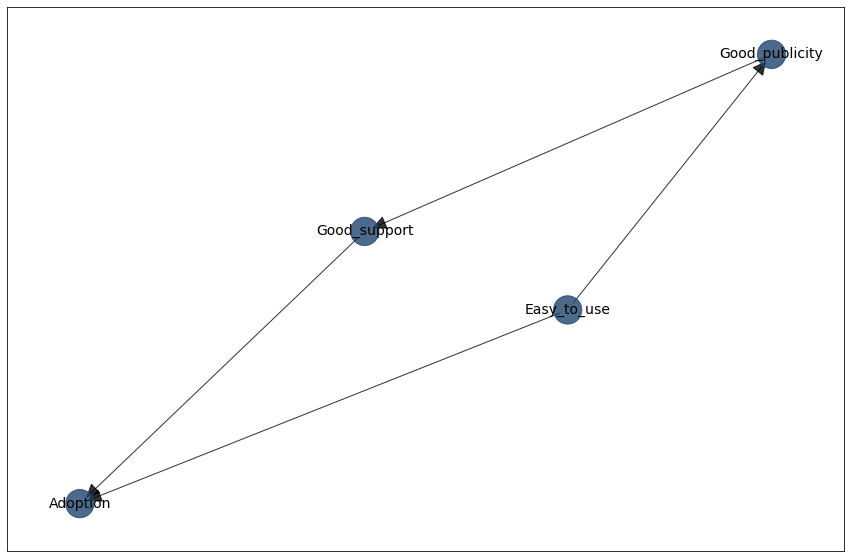

In [6]:
edges = [('Easy_to_use', 'Adoption'),
         ('Easy_to_use', 'Good_publicity'),
         ('Good_publicity', 'Good_support'),
         ('Good_support', 'Adoption')]
DAG = bn.make_DAG(edges)
# [BNLEARN] Bayesian DAG created.

# Print the CPDs
bn.print_CPD(DAG)
bn.plot(DAG)
DAG = bn.parameter_learning.fit(DAG, X_train.join(y_train))

Based on the conditional probability, we could predict the outcome using the trained Bayesian classifier. The choice is between a holdout we performed or a cross validation which is more often used in practice. 

In [7]:
#Pout = bn.predict(model, X_test, variables=["Good_publicity","Good_support","Easy_to_use"])
Pout = bn.predict(DAG, X_test.join(y_test), variables=['Adoption'])
print(Pout)

[bnlearn]> Remaining columns for inference: 3


100%|██████████| 8/8 [00:00<00:00, 278.11it/s]


     Adoption         p
0           1  0.614555
1           0  0.663073
2           1  0.673820
3           0  0.663073
4           1  0.673820
..        ...       ...
495         0  0.663073
496         1  0.673820
497         1  0.673820
498         1  0.673820
499         1  0.673820

[500 rows x 2 columns]


Because the bnlearn package is not a build-in option for the sklearn. We will make our own cross validation loop to obtain the results if we aim to stick with five-fold cross validation with AUC. 

In [8]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
auc_values = np.zeros(5)
itr = 0

In [9]:
for train, test in kf.split(df):
    DAG = bn.parameter_learning.fit(DAG, df.iloc[train,])
    Pout = bn.predict(DAG, df.iloc[test,], variables=['Adoption'])
    auc_values[itr] = roc_auc_score(y[test], Pout["Adoption"])
    itr = itr + 1

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >CPD of Easy_to_use:
+----------------+----------+
| Easy_to_use(0) | 0.499444 |
+----------------+----------+
| Easy_to_use(1) | 0.500556 |
+----------------+----------+
[bnlearn] >CPD of Adoption:
+--------------+-----+--------------------+
| Easy_to_use  | ... | Easy_to_use(1)     |
+--------------+-----+--------------------+
| Good_support | ... | Good_support(1)    |
+--------------+-----+--------------------+
| Adoption(0)  | ... | 0.4096774193548387 |
+--------------+-----+--------------------+
| Adoption(1)  | ... | 0.5903225806451613 |
+--------------+-----+--------------------+
[bnlearn] >CPD of Good_publicity:
+-------------------+------------------+---------------------+
| Easy_to_use       | Easy_to_use(0)   | Easy_to_use(1)      |
+-------------------+------------------+---------------------+
| Good_publicity(0) | 0.64293659621802 | 0.36293007769145397 |
+-------------------+------------------+---

100%|██████████| 8/8 [00:00<00:00, 322.73it/s]


[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >CPD of Easy_to_use:
+----------------+----------+
| Easy_to_use(0) | 0.496111 |
+----------------+----------+
| Easy_to_use(1) | 0.503889 |
+----------------+----------+
[bnlearn] >CPD of Adoption:
+--------------+--------------------+-----+---------------------+
| Easy_to_use  | Easy_to_use(0)     | ... | Easy_to_use(1)      |
+--------------+--------------------+-----+---------------------+
| Good_support | Good_support(0)    | ... | Good_support(1)     |
+--------------+--------------------+-----+---------------------+
| Adoption(0)  | 0.7258771929824561 | ... | 0.39937106918238996 |
+--------------+--------------------+-----+---------------------+
| Adoption(1)  | 0.2741228070175439 | ... | 0.60062893081761    |
+--------------+--------------------+-----+---------------------+
[bnlearn] >CPD of Good_publicity:
+-------------------+--------------------+---------------------+
| Easy_to_use       | Easy_to_us

100%|██████████| 7/7 [00:00<00:00, 291.18it/s]


[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >CPD of Easy_to_use:
+----------------+----------+
| Easy_to_use(0) | 0.492222 |
+----------------+----------+
| Easy_to_use(1) | 0.507778 |
+----------------+----------+
[bnlearn] >CPD of Adoption:
+--------------+-----+--------------------+
| Easy_to_use  | ... | Easy_to_use(1)     |
+--------------+-----+--------------------+
| Good_support | ... | Good_support(1)    |
+--------------+-----+--------------------+
| Adoption(0)  | ... | 0.3931888544891641 |
+--------------+-----+--------------------+
| Adoption(1)  | ... | 0.6068111455108359 |
+--------------+-----+--------------------+
[bnlearn] >CPD of Good_publicity:
+-------------------+---------------------+--------------------+
| Easy_to_use       | Easy_to_use(0)      | Easy_to_use(1)     |
+-------------------+---------------------+--------------------+
| Good_publicity(0) | 0.6354401805869074  | 0.3599562363238512 |
+-------------------+--------------

100%|██████████| 8/8 [00:00<00:00, 385.93it/s]

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >CPD of Easy_to_use:
+----------------+----------+
| Easy_to_use(0) | 0.491667 |
+----------------+----------+
| Easy_to_use(1) | 0.508333 |
+----------------+----------+
[bnlearn] >CPD of Adoption:
+--------------+--------------------+-----+--------------------+
| Easy_to_use  | Easy_to_use(0)     | ... | Easy_to_use(1)     |
+--------------+--------------------+-----+--------------------+
| Good_support | Good_support(0)    | ... | Good_support(1)    |
+--------------+--------------------+-----+--------------------+
| Adoption(0)  | 0.7258771929824561 | ... | 0.3956386292834891 |
+--------------+--------------------+-----+--------------------+
| Adoption(1)  | 0.2741228070175439 | ... | 0.6043613707165109 |
+--------------+--------------------+-----+--------------------+
[bnlearn] >CPD of Good_publicity:
+-------------------+---------------------+---------------------+
| Easy_to_use       | Easy_to_use(0)    

[bnlearn]> Remaining columns for inference: 3


100%|██████████| 8/8 [00:00<00:00, 518.71it/s]


[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >CPD of Easy_to_use:
+----------------+----------+
| Easy_to_use(0) | 0.487222 |
+----------------+----------+
| Easy_to_use(1) | 0.512778 |
+----------------+----------+
[bnlearn] >CPD of Adoption:
+--------------+--------------------+-----+---------------------+
| Easy_to_use  | Easy_to_use(0)     | ... | Easy_to_use(1)      |
+--------------+--------------------+-----+---------------------+
| Good_support | Good_support(0)    | ... | Good_support(1)     |
+--------------+--------------------+-----+---------------------+
| Adoption(0)  | 0.7264770240700219 | ... | 0.39308176100628933 |
+--------------+--------------------+-----+---------------------+
| Adoption(1)  | 0.2735229759299781 | ... | 0.6069182389937107  |
+--------------+--------------------+-----+---------------------+
[bnlearn] >CPD of Good_publicity:
+-------------------+--------------------+--------------------+
| Easy_to_use       | Easy_to_use

100%|██████████| 8/8 [00:00<00:00, 679.27it/s]


In [10]:
auc_values

array([0.89516129, 0.84375   , 0.86363636, 0.91044776, 0.875     ])

Now we switch from using Bayesian classifiers to use Bayesian inference. We will fit a logistic regression model. The difference is that this time, we will not use the sklearn package but rather use Bayesian inference.  <a href="https://docs.pymc.io/en/v3/">Pymc3</a> is a package supports Bayesian statistical modelling and probabilistic machine learning – this is what we need. 

More examples on https://docs.pymc.io/en/v3/pymc-examples/examples/generalized_linear_models/GLM-logistic.html 

In [11]:
import warnings

from collections import OrderedDict
from time import time

import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm
import seaborn
import theano as thno
import theano.tensor as T

from scipy import integrate
from scipy.optimize import fmin_powell

print(f"Running on PyMC3 v{pm.__version__}")

Running on PyMC3 v3.10.0


In [12]:
%config InlineBackend.figure_format = 'retina'
RANDOM_SEED = 8927
np.random.seed(RANDOM_SEED)

Below is a utility function we adopt to later summarize and plot the Bayesian inference outcome. 

In [13]:
def plot_traces(traces, model, retain=0):
    """
    Convenience function:
    Plot traces with overlaid means and values
    """
    with model:
        ax = az.plot_trace(
            traces[-retain:],
            lines=tuple([(k, {}, v["mean"]) for k, v in az.summary(traces[-retain:]).iterrows()]),
        )

        for i, mn in enumerate(az.summary(traces[-retain:])["mean"]):
            ax[i, 0].annotate(
                f"{mn:.2f}",
                xy=(mn, 0),
                xycoords="data",
                xytext=(5, 10),
                textcoords="offset points",
                rotation=90,
                va="bottom",
                fontsize="large",
                color="#AA0022",
            )

In [14]:
with pm.Model() as logistic_model:
    pm.glm.GLM.from_formula(
        "Adoption ~ Good_publicity + Good_support + Easy_to_use", df, family=pm.glm.families.Binomial()
    )
    trace = pm.sample(1000, tune=1000, init="adapt_diag")
    az.summary(trace, kind="stats")

In [15]:
az.summary(trace, kind="stats")

,mean,sd,hdi_3%,hdi_97%
Intercept,-5.338,0.776,-6.684,-3.873
Good_publicity,0.498,0.395,-0.340,1.153
Good_support,6.954,0.794,5.581,8.510
Easy_to_use,6.927,0.801,5.432,8.359


Compared to a regression result of “frequentist” approach, instead of a point estimate, we obtain a “region” of estimations, and summarize the regression results over multiple runs using the “peak” of the slope. Since the coefficients reported in different runs are still in a bell-shaped curve, most likely we could adopt this way of taking the summary statistics. 

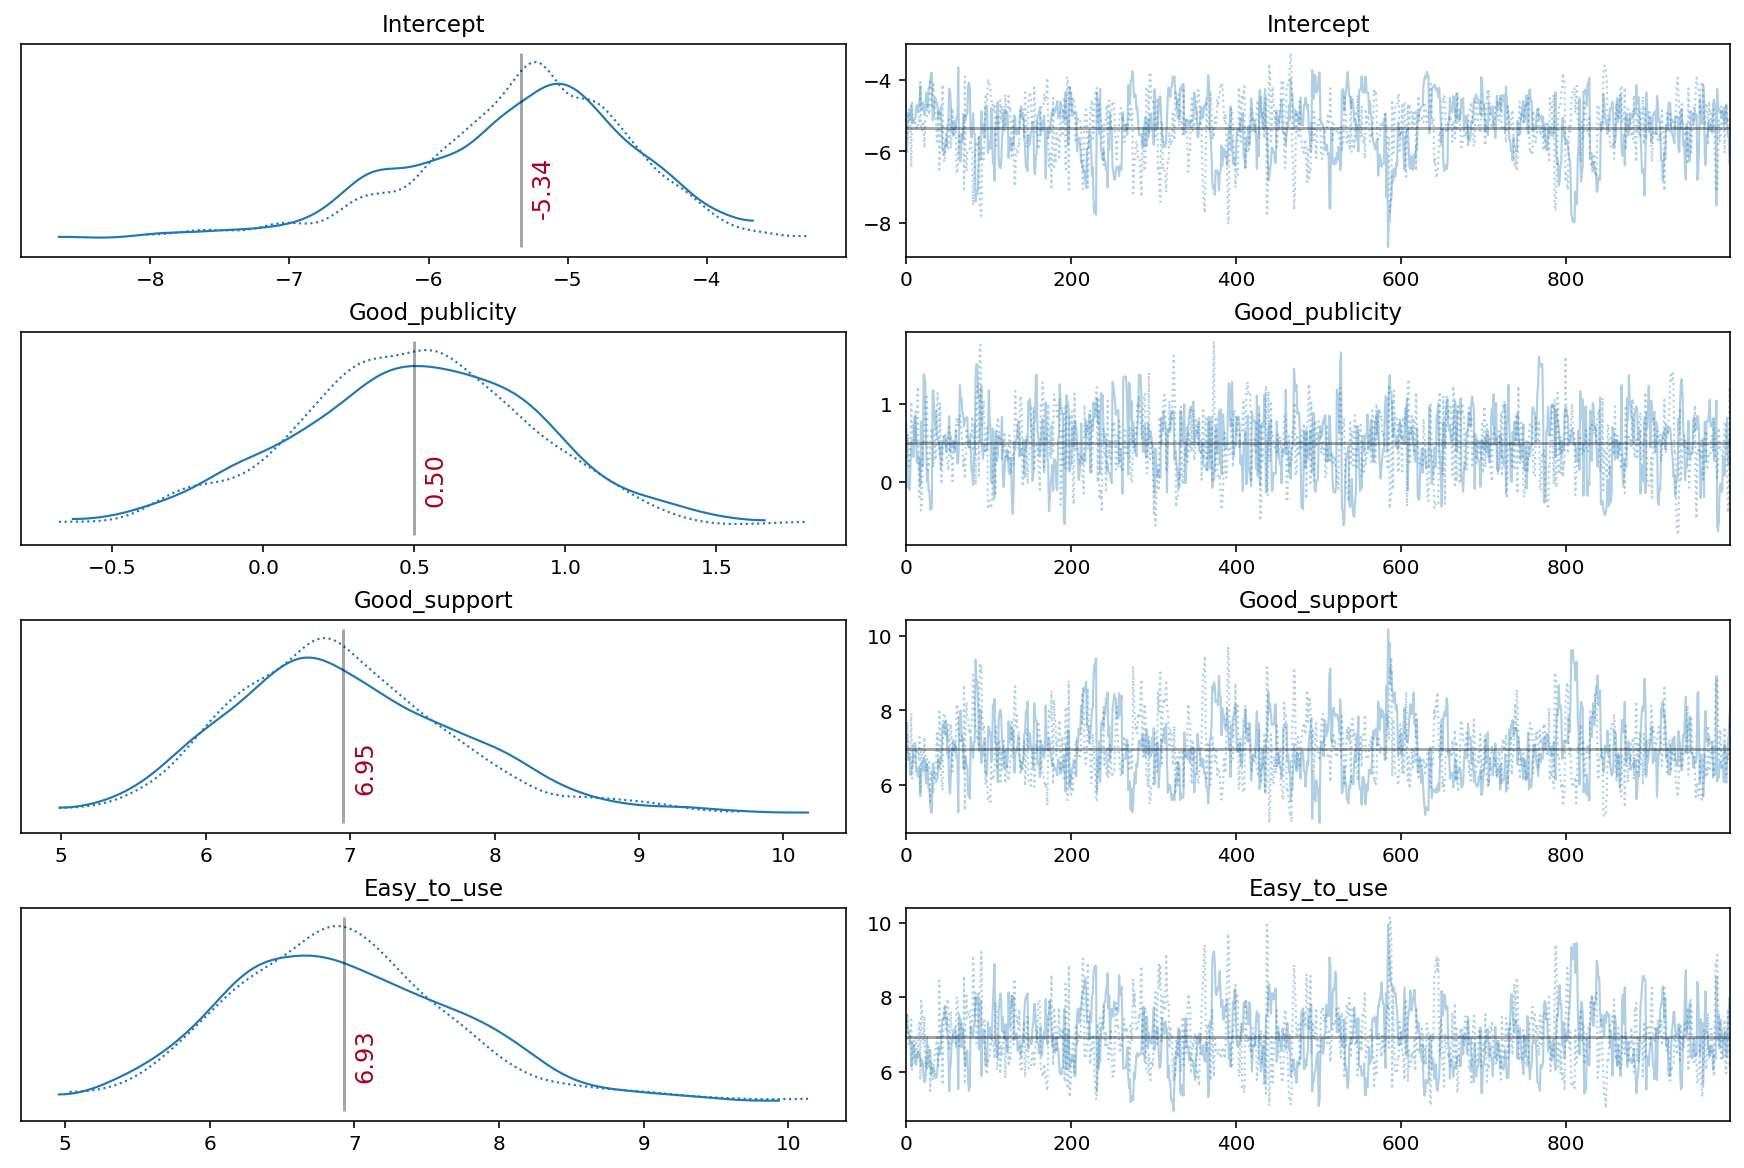

In [16]:
plot_traces(trace, logistic_model);

If you are interested to test out other alternatives, <a href="https://scikit-learn.org/stable/auto_examples/linear_model/plot_bayesian_ridge.html?highlight=bayesian">Bayesian Ridge Regression</a> is one method to test. The sklearn package includes such model. 